## File : Exercise 3-1_Edris_Safari.ipynb
## Name:Edris Safari
## Date:12/20/2019
## Course: DSC530 - Data Exploration and Analysis
## Desc: Week4 exercise 3-1 assignment

In [4]:

from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

 

### Function BiasPmf(From chap03ex.ipynb) caclulates the biased PMF for each value and then normalizes the value so the total sum of values is equal to one.

In [6]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf    
    new_pmf.Normalize()
    return new_pmf


In [7]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

### Read the female respondants data set from these files:
### 2002FemPreg.dct,2002FemPreg.dat.gz

In [30]:
resp = nsfg.ReadFemResp()


0       3
1       0
2       0
3       0
4       0
       ..
7638    0
7639    0
7640    0
7641    0
7642    0
Name: numkdhh, Length: 7643, dtype: int64

### create pmf of the number of kidds per house hold

In [38]:
pmf = thinkstats2.Pmf(resp['numkdhh'], label='numkdhh')
pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'numkdhh')

### Plot the pmf of the number of children  per houshold

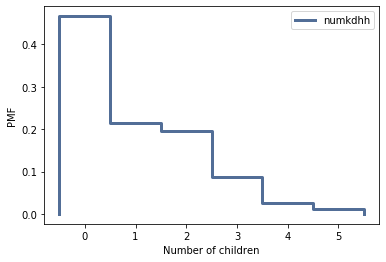

In [39]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

### Compute bias by multiplying the pmf value by itself. Normalize the pdf so 
### probability values add up to one.

In [49]:
biased_pmf = BiasPmf(pmf, label='biased')
biased_pmf

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'biased')

### Plot pmf and biased PMF. The graph shows that the bias is considerably lower for households with zero  
### chilfren and  higher for 2 to 5 children. For families with 1 child, biased and bsered values are the same.

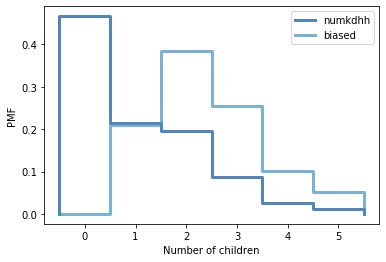

In [50]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

### Caculate the mean of pmf and its bias

In [51]:
pmf_mean = pmf.Mean()
biased_pmf_mean = biased_pmf.Mean()
print ('pmf_mean= ' + str(pmf_mean))
print ('biased_pmf_mean= ' + str(biased_pmf_mean))


pmf_mean= 1.024205155043831
biased_pmf_mean= 2.403679100664282
